In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('CustomerChurn.csv')

In [3]:
data

,ID,CallFailure,Complaints,SubscriptionLength,ChargeAmount,SecondsofUse,Frequencyofuse,FrequencyofSMS,DistinctCalledNumbers,AgeGroup,TariffPlan,Status,Age,CustomerValue,Churn
0,1,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,2,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,3,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,4,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,5,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,2195,10,0,22,2,2060,35,40,18,3,1,1,30,243.800,0
2195,2196,24,0,21,3,6758,150,97,46,2,2,1,25,747.360,0
2196,2197,20,0,19,2,9298,180,85,44,5,1,1,55,269.670,0
2197,2198,16,0,20,5,3218,54,43,23,3,2,1,30,302.880,0


<AxesSubplot:>

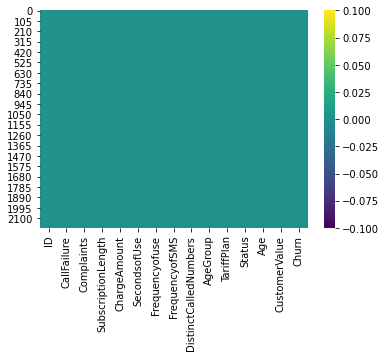

In [4]:
sns.heatmap(data.isnull(),cmap='viridis')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2199 non-null   int64  
 1   CallFailure            2199 non-null   int64  
 2   Complaints             2199 non-null   int64  
 3   SubscriptionLength     2199 non-null   int64  
 4   ChargeAmount           2199 non-null   int64  
 5   SecondsofUse           2199 non-null   int64  
 6   Frequencyofuse         2199 non-null   int64  
 7   FrequencyofSMS         2199 non-null   int64  
 8   DistinctCalledNumbers  2199 non-null   int64  
 9   AgeGroup               2199 non-null   int64  
 10  TariffPlan             2199 non-null   int64  
 11  Status                 2199 non-null   int64  
 12  Age                    2199 non-null   int64  
 13  CustomerValue          2199 non-null   float64
 14  Churn                  2199 non-null   int64  
dtypes: f

In [6]:
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [ID, CallFailure, Complaints, SubscriptionLength, ChargeAmount, SecondsofUse, Frequencyofuse, FrequencyofSMS, DistinctCalledNumbers, AgeGroup, TariffPlan, Status, Age, CustomerValue, Churn]
Index: []


In [7]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn',axis=1), 
                                                    data['Churn'], test_size=0.10)

In [191]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [192]:
rfc_pred = rfc.predict(X_test)

In [193]:
print(confusion_matrix(y_test,rfc_pred))

[[183   3]
 [  3  31]]


In [194]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       186
           1       0.91      0.91      0.91        34

    accuracy                           0.97       220
   macro avg       0.95      0.95      0.95       220
weighted avg       0.97      0.97      0.97       220



In [57]:
data2 = pd.read_csv('Tobepredicted.csv')

In [58]:
data2

,ID,CallFailure,Complaints,SubscriptionLength,ChargeAmount,SecondsofUse,Frequencyofuse,FrequencyofSMS,DistinctCalledNumbers,AgeGroup,TariffPlan,Status,Age,CustomerValue
0,2200,11,1,13,3,1853,28,12,11,3,1,1,30,123.24
1,2201,10,0,38,1,4615,74,7,17,3,1,1,30,215.56
2,2202,5,0,39,0,563,8,9,4,3,1,2,30,58.84
3,2203,12,0,37,1,2698,63,361,24,3,1,1,30,1554.44
4,2204,12,0,38,1,4443,69,7,35,1,1,1,15,286.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,3146,21,0,19,2,6697,147,92,44,2,2,1,25,721.98
947,3147,17,0,17,1,9237,177,80,42,5,1,1,55,261.21
948,3148,13,0,18,4,3157,51,38,21,3,1,1,30,280.32
949,3149,7,0,11,2,4695,46,222,12,3,1,1,30,1077.64


In [59]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     951 non-null    int64  
 1   CallFailure            951 non-null    int64  
 2   Complaints             951 non-null    int64  
 3   SubscriptionLength     951 non-null    int64  
 4   ChargeAmount           951 non-null    int64  
 5   SecondsofUse           951 non-null    int64  
 6   Frequencyofuse         951 non-null    int64  
 7   FrequencyofSMS         951 non-null    int64  
 8   DistinctCalledNumbers  951 non-null    int64  
 9   AgeGroup               951 non-null    int64  
 10  TariffPlan             951 non-null    int64  
 11  Status                 951 non-null    int64  
 12  Age                    951 non-null    int64  
 13  CustomerValue          951 non-null    float64
dtypes: float64(1), int64(13)
memory usage: 104.1 KB


<AxesSubplot:>

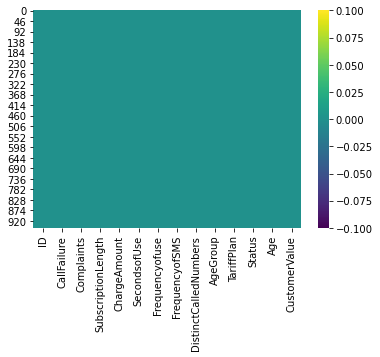

In [60]:
sns.heatmap(data2.isnull(), cmap='viridis')

In [61]:
is_NaN = data2.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data2[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [ID, CallFailure, Complaints, SubscriptionLength, ChargeAmount, SecondsofUse, Frequencyofuse, FrequencyofSMS, DistinctCalledNumbers, AgeGroup, TariffPlan, Status, Age, CustomerValue]
Index: []


In [195]:
rfc_pred = rfc.predict(data2)

In [196]:
final = pd.DataFrame({'ID':data2['ID'],'Churn':rfc_pred})

In [197]:
final.to_csv('Final_submission_7.csv')

In [198]:
final

,ID,Churn
0,2200,1
1,2201,0
2,2202,1
3,2203,0
4,2204,0
...,...,...
946,3146,0
947,3147,0
948,3148,0
949,3149,0
